In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# importing necessary libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV

sns.set()
%matplotlib inline

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/forest_cov_clean.csv")
df['Forest_cover_type'].value_counts()

2    280193
1    210004
3     35546
7     19685
6     17345
5      9453
4      2741
Name: Forest_cover_type, dtype: int64

In [ ]:
df.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_area_1', 'Wilderness_area_2', 'Wilderness_area_3',
       'Wilderness_area_4', 'Soil_type', 'Forest_cover_type',
       'Euclidian_Distance_To_Hydrology', 'Euclidean_Distance_To_Hydrology',
       'sqrt_slope', 'sqrt_Horizontal_Distance_To_Roadways',
       'cbrt_Horizontal_Distance_To_Fire_Points', 'square_Elevation',
       'Euclidean_Distance_to_Roadways'],
      dtype='object')

In [ ]:
# Original columns
columns = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_area_1', 'Wilderness_area_2', 'Wilderness_area_3',
       'Wilderness_area_4', 'Soil_type', 'Forest_cover_type']

# transformed columns
transformed_columns = ['Aspect', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_area_1', 'Wilderness_area_2', 'Wilderness_area_3',
       'Wilderness_area_4', 'Soil_type', 'Euclidean_Distance_To_Hydrology',
       'sqrt_slope', 'sqrt_Horizontal_Distance_To_Roadways',
       'cbrt_Horizontal_Distance_To_Fire_Points', 'square_Elevation',
       'Euclidean_Distance_to_Roadways', 'Forest_cover_type']

X = df[columns[:-1]]
y = df[columns[-1]]

X_t = df[transformed_columns[:-1]]
y_t = df[transformed_columns[-1]]

print(X_t.shape)
print(y_t.shape)

print(X.shape)
print(y.shape)

(574967, 15)
(574967,)
(574967, 14)
(574967,)


In [ ]:
# splitting train and test set taking the transformed columns mixed with originals
X_train, X_test, y_train, y_test = train_test_split(X_t, y_t, random_state=42, test_size=0.2)
X_train.head()

,Aspect,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_area_1,Wilderness_area_2,Wilderness_area_3,Wilderness_area_4,Soil_type,Euclidean_Distance_To_Hydrology,sqrt_slope,sqrt_Horizontal_Distance_To_Roadways,cbrt_Horizontal_Distance_To_Fire_Points,square_Elevation,Euclidean_Distance_to_Roadways
145168,310,232,185,569,1,0,0,0,29,171.548827,3.464102,72.828566,8.286493,9796900,6158.678105
523357,132,212,68,1884,0,0,1,0,32,230.982683,5.291503,47.169906,12.350759,10719076,3958.497316
495913,242,248,224,2173,0,0,1,0,33,96.648849,5.477226,52.640289,12.952489,8773444,4056.092331
501077,0,225,154,1777,0,1,0,0,24,668.852749,2.828427,34.029399,12.112370,10764961,3479.356981
62282,346,228,161,2657,1,0,0,0,30,270.024073,2.828427,44.317040,13.850449,8031556,3448.021462


In [ ]:
y_train

145168    2
523357    1
495913    2
501077    1
62282     1
         ..
110268    2
259178    1
365838    1
131932    2
121958    2
Name: Forest_cover_type, Length: 459973, dtype: int64

In [ ]:
# scaling the inputs
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Checking the classification with hyperparameter tuned Decision Tree

In [ ]:
# gridsearch for best hyperparameters for a decision tree
tree = DecisionTreeClassifier()

params = {'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': range(18, 30, 2)}

grid = GridSearchCV(tree, params, scoring='accuracy', cv=5, verbose=3)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END criterion=gini, max_depth=18, max_features=auto;, score=0.857 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=18, max_features=auto;, score=0.872 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=18, max_features=auto;, score=0.874 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=18, max_features=auto;, score=0.864 total time=   1.7s
[CV 5/5] END criterion=gini, max_depth=18, max_features=auto;, score=0.855 total time=   1.6s
[CV 1/5] END criterion=gini, max_depth=18, max_features=sqrt;, score=0.848 total time=   1.7s
[CV 2/5] END criterion=gini, max_depth=18, max_features=sqrt;, score=0.873 total time=   1.6s
[CV 3/5] END criterion=gini, max_depth=18, max_features=sqrt;, score=0.872 total time=   1.6s
[CV 4/5] END criterion=gini, max_depth=18, max_features=sqrt;, score=0.854 total time=   1.6s
[CV 5/5] END criterion=gini, max_depth=18, max_features=sqrt;, score=0.859 total time=   1.6

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(18, 30, 2),
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='accuracy', verbose=3)

In [ ]:
grid.best_estimator_.score(X_test, y_test)

0.9249960867523523

#### The Decision Tree gave an accuracy of 92%. Lets look at the classification report and confusion matrix between the predicted and true labels

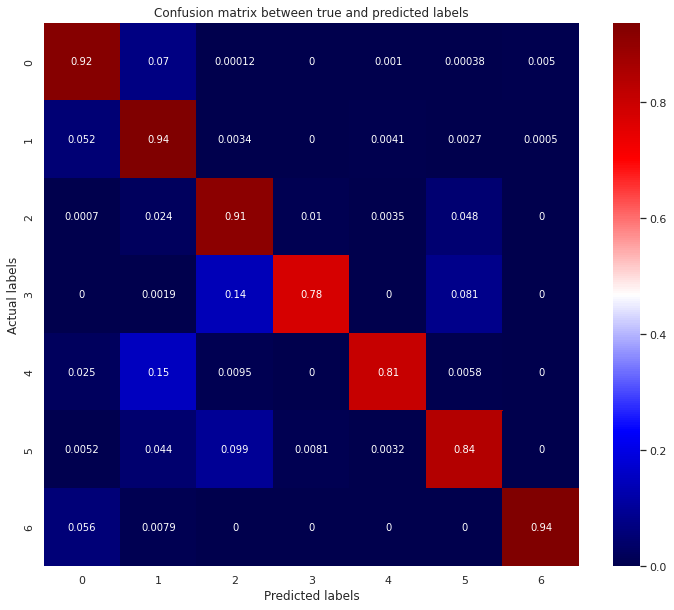

In [ ]:
# predicted labels
y_pred = grid.best_estimator_.predict(X_test)

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='seismic')
ax.set_title("Confusion matrix between true and predicted labels")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")

plt.show()

In [ ]:
# The precision, recall and f1-score will give a better idea about how our model performed at predicting specific labels
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.92      0.92      0.92     42012
           2       0.94      0.94      0.94     56022
           3       0.91      0.91      0.91      7143
           4       0.80      0.78      0.79       531
           5       0.83      0.81      0.82      1887
           6       0.84      0.84      0.84      3472
           7       0.94      0.94      0.94      3927

    accuracy                           0.92    114994
   macro avg       0.88      0.88      0.88    114994
weighted avg       0.92      0.92      0.92    114994



#### The precision, recall for cover type 4, 5, 6 are lower than that of the rest. This could be due to the lower number of datapoints compared to the other types of cover. Maybe ensemble will give better estimates

In [ ]:
# best parameters for the decision tree
grid.best_params_

{'criterion': 'entropy', 'max_depth': 28, 'max_features': 'log2'}

### Checking the correlation between each of the variable and cover type so that the best variables can be chosen to build an accurate model

In [ ]:
correlation_df = pd.DataFrame(df[set(columns + transformed_columns)].corr())
correlation_df = pd.DataFrame(correlation_df['Forest_cover_type']).reset_index()

correlation_df.columns = ['Features', 'Forest_cover_type']

correlation_df = correlation_df.sort_values(by='Forest_cover_type')
correlation_df[:-1]

,Features,Forest_cover_type
18,Elevation,-0.282478
8,square_Elevation,-0.260229
4,Euclidean_Distance_to_Roadways,-0.203245
6,Wilderness_area_1,-0.202530
7,Soil_type,-0.171382
11,sqrt_Horizontal_Distance_To_Roadways,-0.169443
19,Horizontal_Distance_To_Roadways,-0.161618
2,cbrt_Horizontal_Distance_To_Fire_Points,-0.125472
13,Horizontal_Distance_To_Fire_Points,-0.113469
14,Hillshade_Noon,-0.097701


In [ ]:
correlation_df['Features'].tolist()

['Elevation',
 'square_Elevation',
 'Euclidean_Distance_to_Roadways',
 'Wilderness_area_1',
 'Soil_type',
 'sqrt_Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways',
 'cbrt_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Fire_Points',
 'Hillshade_Noon',
 'Hillshade_3pm',
 'Wilderness_area_2',
 'Horizontal_Distance_To_Hydrology',
 'Euclidean_Distance_To_Hydrology',
 'Aspect',
 'Wilderness_area_3',
 'Vertical_Distance_To_Hydrology',
 'sqrt_slope',
 'Slope',
 'Wilderness_area_4',
 'Forest_cover_type']

In [ ]:
# choosing the best features from the correlation dataframe and exclude the features that does not contributes much to the target
final_features = ['Elevation',
 'Euclidean_Distance_to_Roadways',
 'Wilderness_area_1',
 'Soil_type',
 'sqrt_Horizontal_Distance_To_Roadways',
 'Horizontal_Distance_To_Roadways',
 'cbrt_Horizontal_Distance_To_Fire_Points',
 'Horizontal_Distance_To_Fire_Points',
 'Hillshade_Noon',
 'Wilderness_area_3',
 'Vertical_Distance_To_Hydrology',
 'Slope',
 'Wilderness_area_4',
 'Forest_cover_type']

X_final = df[final_features[:-1]]
y_final = df[final_features[-1]]

y_final = [int(value)-1 for value in y_final]

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(X_final, y_final, random_state=42, test_size=0.2)
X_train_final.head()

,Elevation,Euclidean_Distance_to_Roadways,Wilderness_area_1,Soil_type,sqrt_Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Roadways,cbrt_Horizontal_Distance_To_Fire_Points,Horizontal_Distance_To_Fire_Points,Hillshade_Noon,Wilderness_area_3,Vertical_Distance_To_Hydrology,Slope,Wilderness_area_4
145168,3130,6158.678105,1,29,72.828566,5304,8.286493,569,232,0,23,12,0
523357,3274,3958.497316,0,32,47.169906,2225,12.350759,1884,212,1,37,28,0
495913,2962,4056.092331,0,33,52.640289,2771,12.952489,2173,248,1,46,30,0
501077,3281,3479.356981,0,24,34.029399,1158,12.112370,1777,225,0,120,8,0
62282,2834,3448.021462,1,30,44.317040,1964,13.850449,2657,228,0,33,8,0


In [ ]:
# scaling the features for input in specific models like KNN
scaler = StandardScaler()

X_train_final_scaled = scaler.fit_transform(X_train_final)
X_test_final_scaled = scaler.transform(X_test_final)

In [ ]:
# function for evaluating the model wrt accuracy score
def fit_evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier

### To check the accuracy against the each model with default parameters and determine the best model.

In [ ]:
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
et = ExtraTreesClassifier()
xb = XGBClassifier()

score_dict = []
for model in [knn, rf, et, xb]:
    if model == knn:
        score = fit_evaluate_model(model, X_train_final_scaled, X_test_final_scaled, y_train_final, y_test_final)
    else:
        score = fit_evaluate_model(model, X_train_final, X_test_final, y_train_final, y_test_final)
    score_dict.append(score)
    print(str(model), "score: ", score)

KNeighborsClassifier() score:  0.9348835591422161
RandomForestClassifier() score:  0.964815555594205
ExtraTreesClassifier() score:  0.9675809172652486
XGBClassifier(objective='multi:softprob') score:  0.7386820181922535


Text(0.5, 1.0, 'Accuracy score of different Models')

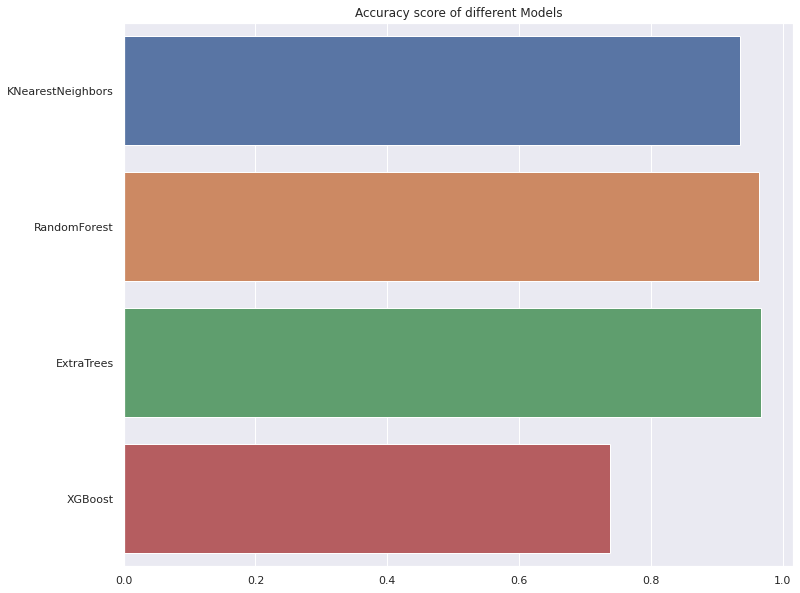

In [ ]:
plt.figure(figsize=(12, 10))

ax = sns.barplot(x= score_dict, y= ['KNearestNeighbors', 'RandomForest', 'ExtraTrees', 'XGBoost'])
ax.set_title("Accuracy score of different Models")

#### It can be seen that the acuracy of ExtraTrees marginally exceeds RandomForest and quite drastically exceeds gradient boosting model. So performing hyperpameter tuning on ExtraTrees might be able to give better results.

In [ ]:
# hyperparameters to test against
n_estimators = [50, 100, 200]

min_samples_split = [2, 3, 5, 7, 9]

min_samples_leaf = [1, 2, 4, 6, 8]

max_features = ['auto', 'sqrt', 'log2', None]

hyperparam_grid = {'n_estimators': n_estimators,
                  'min_samples_split': min_samples_split,
                  'min_samples_leaf': min_samples_leaf,
                  'max_features': max_features}

In [ ]:
# Lets use RandomSearchCV this time
model = ExtraTreesClassifier(random_state=42, n_jobs=-1)

# create randomized search object
random_cv = RandomizedSearchCV(estimator= model,
                              param_distributions= hyperparam_grid,
                              cv= 5, n_iter= 20,
                              scoring= 'accuracy', verbose= 10,
                              return_train_score= True,
                              random_state= 42)

In [ ]:
random_cv.fit(X_final, y_final)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5; 1/20] START max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200
[CV 1/5; 1/20] END max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200;, score=(train=0.963, test=0.617) total time= 1.0min
[CV 2/5; 1/20] START max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200
[CV 2/5; 1/20] END max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200;, score=(train=0.963, test=0.451) total time= 1.0min
[CV 3/5; 1/20] START max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200
[CV 3/5; 1/20] END max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200;, score=(train=0.963, test=0.479) total time= 1.1min
[CV 4/5; 1/20] START max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200
[CV 4/5; 1/20] END max_features=log2, min_samples_leaf=6, min_samples_split=5, n_estimators=200;, s

RandomizedSearchCV(cv=5,
                   estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
                   n_iter=20,
                   param_distributions={'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 5, 7, 9],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=10)

In [ ]:
random_cv.best_estimator_

ExtraTreesClassifier(max_features=None, n_jobs=-1, random_state=42)

In [ ]:
random_cv.best_params_

{'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

#### So the best hyperparameters for ExtraTreesClassifier seems to be:
##### max_features = None, which means all the features; default (100) number of estimators.

In [ ]:
# Fitting the ExtraTrees model with the above mentioned best hyperparameters to the previously split train data
et_best = ExtraTreesClassifier(max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100)

et_best.fit(X_train_final, y_train_final)

ExtraTreesClassifier(max_features=None)

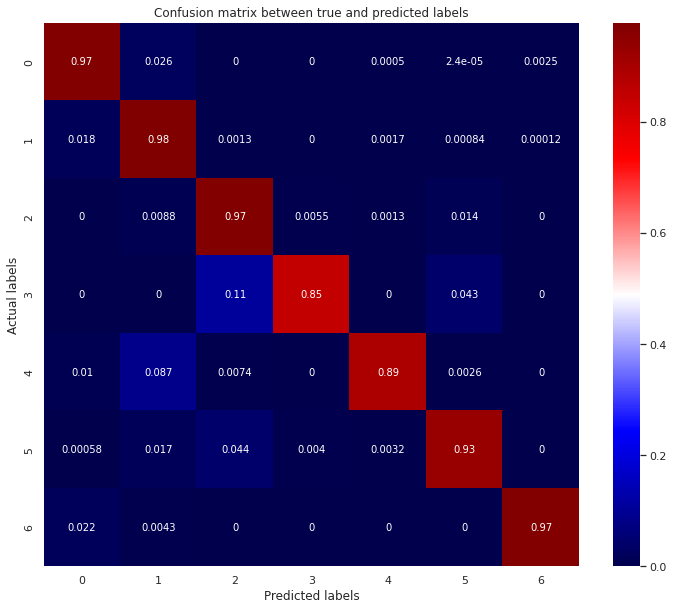

In [ ]:
# checking with Confusion martix to determine each forest cover type predicting accuracy
y_pred_final = et_best.predict(X_test_final)

plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test_final, y_pred_final)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='seismic')
ax.set_title("Confusion matrix between true and predicted labels")
ax.set_xlabel("Predicted labels")
ax.set_ylabel("Actual labels")

plt.show()

In [ ]:
# Checking the classification report
print(classification_report(y_test_final, y_pred_final))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     42012
           1       0.98      0.98      0.98     56022
           2       0.96      0.97      0.96      7143
           3       0.89      0.85      0.87       531
           4       0.92      0.89      0.91      1887
           5       0.95      0.93      0.94      3472
           6       0.97      0.97      0.97      3927

    accuracy                           0.97    114994
   macro avg       0.95      0.94      0.94    114994
weighted avg       0.97      0.97      0.97    114994



In [ ]:
# lets print the overall accuracy
print(fit_evaluate_model(ExtraTreesClassifier(max_features=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100, random_state=42, n_jobs=-1), X_train_final, X_test_final, y_train_final, y_test_final))

0.9715463415482547


### Conclusion:
#### The Extra Trees model gave a pretty good result in predicting the forest cover type based on the selected features. There are some interrelated features but Decision Trees are quite robust to correlation.
#### According to the reports above and analysis of the data, Spruce/Fir and Lodgepole Pine are abundant in the areas and also easy to predict with the datapoints. The cover types Cottonwood Willow and Aspen are rare in the areas compared to the other types, especially the Cottonwood Willow which only seems to grow in the cache la poudre wilderness area and so the prediction of this type of cover is weak compared to the others. The other three types of cover types grows normally across.